In [1]:
!pip install calmap

In [2]:
!pip install emoji

In [11]:
f = open("C:\\Users\\Amir Khan\\Downloads\\estwhatsappchat.txt","r",encoding="utf-8")
data = f.read()
print(data)

31/07/23, 9:49 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
31/07/23, 9:45 pm - Aayush Agnel created group "EST AN5I"
31/07/23, 9:49 pm - You joined using this group's invite link
31/07/23, 9:49 pm - +91 96979 88482 joined using this group's invite link
31/07/23, 9:50 pm - Enosh Agnel joined using this group's invite link
31/07/23, 9:50 pm - +91 72083 60073 joined using this group's invite link
31/07/23, 9:51 pm - +91 70215 84274 joined using this group's invite link
31/07/23, 9:51 pm - Maithili Agnel joined using this group's invite link
31/07/23, 9:52 pm - +91 99692 72835 joined using this group's invite link
31/07/23, 9:53 pm - Shivani Agnel joined using this group's invite link
31/07/23, 9:53 pm - Nimit Agnel joined using this group's invite link
31/07/23, 9:55 pm - +91 83569 84460 joined using this group's invite link
31/07/23, 9:56 pm - Samarth Agnel joined using this group's invit

In [13]:
pattern = '\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{1,2}\s(?:am|pm)\s-\s'

In [14]:
import re
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from collections import Counter
import emoji
import collections
import calmap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import wordCloud

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\Amir
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'wordcloud'

In [15]:
messages = re.split(pattern,data)[1:]


In [16]:
dates = re.findall(pattern,data)


In [17]:
from datetime import datetime
df = pd.DataFrame({'user_message':messages,"message_date":dates}) 
def convert24(time):
    time=time.split(",")

    t = datetime.strptime(time[1].strip(" -"), '%I:%M %p')

    ta= time[0]+","+t.strftime('%H:%M')
    return ta

df['message_date'] = df['message_date'].apply(lambda x: convert24(x))
df["message_date"] = pd.to_datetime(df["message_date"],format="%d/%m/%y,%H:%M")
df.tail()

,user_message,message_date
114,"Est Sir: Students, I hope you have checked you...",2023-11-16 16:24:00
115,Est Sir: Its compulsory.\n,2023-11-16 16:25:00
116,Est Sir: <Media omitted>\n,2023-12-07 19:40:00
117,Est Sir: Check your EST exam timetable\n,2023-12-07 19:41:00
118,Est Sir: Football Match:\n\n Final Match at 2 ...,2024-02-14 13:20:00


In [18]:
df.shape

(119, 2)

In [19]:
df.head()

,user_message,message_date
0,Messages and calls are end-to-end encrypted. N...,2023-07-31 21:49:00
1,"Aayush Agnel created group ""EST AN5I""\n",2023-07-31 21:45:00
2,You joined using this group's invite link\n,2023-07-31 21:49:00
3,+91 96979 88482 joined using this group's invi...,2023-07-31 21:49:00
4,Enosh Agnel joined using this group's invite l...,2023-07-31 21:50:00


In [20]:
users=[]
messages=[]
for message in df["user_message"]:
    entry = re.split("([\w+\W]+?):\s",message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append("group_notification")
        messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)

In [21]:


df['day'] = df['message_date'].dt.strftime('%a')
df['month'] = df['message_date'].dt.strftime('%b')
df['year'] = df['message_date'].dt.year
df['date'] = df['message_date'].apply(lambda x: x.date())
# df['hour']=df['message_date'].dt.hour
# df['minute']=df['message_date'].dt.minute

In [22]:
df

,message_date,user,message,day,month,year,date
0,2023-07-31 21:49:00,group_notification,Messages and calls are end-to-end encrypted. N...,Mon,Jul,2023,2023-07-31
1,2023-07-31 21:45:00,group_notification,"Aayush Agnel created group ""EST AN5I""\n",Mon,Jul,2023,2023-07-31
2,2023-07-31 21:49:00,group_notification,You joined using this group's invite link\n,Mon,Jul,2023,2023-07-31
3,2023-07-31 21:49:00,group_notification,+91 96979 88482 joined using this group's invi...,Mon,Jul,2023,2023-07-31
4,2023-07-31 21:50:00,group_notification,Enosh Agnel joined using this group's invite l...,Mon,Jul,2023,2023-07-31
...,...,...,...,...,...,...,...
114,2023-11-16 16:24:00,Est Sir,"Students, I hope you have checked your marks ,...",Thu,Nov,2023,2023-11-16
115,2023-11-16 16:25:00,Est Sir,Its compulsory.\n,Thu,Nov,2023,2023-11-16
116,2023-12-07 19:40:00,Est Sir,<Media omitted>\n,Thu,Dec,2023,2023-12-07
117,2023-12-07 19:41:00,Est Sir,Check your EST exam timetable\n,Thu,Dec,2023,2023-12-07


In [23]:
messages_by_user = df['user'].value_counts()
messages_by_user

user
group_notification     55
Est Sir                35
Vishwa Agnel            7
Yash Agnel              2
Kavya Agnel             2
Disha Agnel             2
Shivani Agnel           1
Enosh Agnel             1
Ashutosh Koli           1
Prem Agnel              1
Harsh Agnel             1
+91 97024 84223         1
Yash Panchal            1
Lyshelle                1
+91 79000 06496         1
Pranali Agnel           1
Minjal Agnel            1
Samrufdhi Agnel New     1
+91 70215 84274         1
+91 96979 88482         1
Sarthak Agnrl           1
+91 83569 84460         1
Name: count, dtype: int64

In [24]:
percent_messages_by_user = 100*(messages_by_user)/df.shape[0]
p = round(percent_messages_by_user, 2)
p_D = pd.DataFrame({'email':p.index, 'list':p.values})
p_D

,email,list
0,group_notification,46.22
1,Est Sir,29.41
2,Vishwa Agnel,5.88
3,Yash Agnel,1.68
4,Kavya Agnel,1.68
5,Disha Agnel,1.68
6,Shivani Agnel,0.84
7,Enosh Agnel,0.84
8,Ashutosh Koli,0.84
9,Prem Agnel,0.84


In [25]:
import pandas as pd



df1 = df.copy()
df1['message_count'] = 1  
df1 = df1.drop(columns='year')  
df1 = df1.groupby('date')['message_count'].sum().reset_index()  

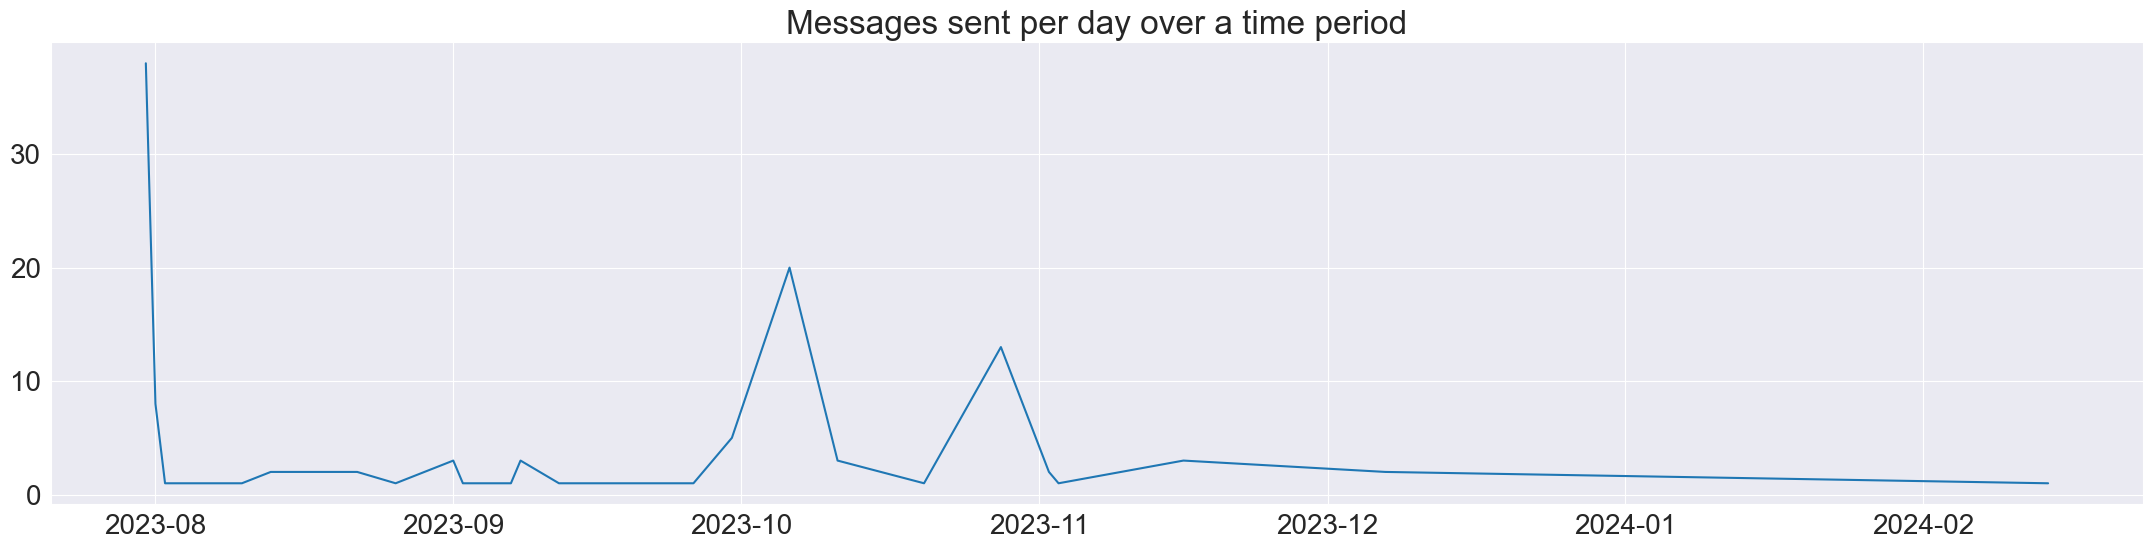

In [26]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)   

plt.plot(df1.date, df1.message_count)
plt.title('Messages sent per day over a time period');

In [27]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)
top10days.reset_index(inplace=True)
top10days.drop(columns="index", inplace=True)
top10days

,date,message_count
0,2023-07-31,38
1,2023-10-06,20
2,2023-10-28,13
3,2023-08-01,8
4,2023-09-30,5
5,2023-11-16,3
6,2023-09-08,3
7,2023-10-11,3
8,2023-09-01,3
9,2023-08-21,2


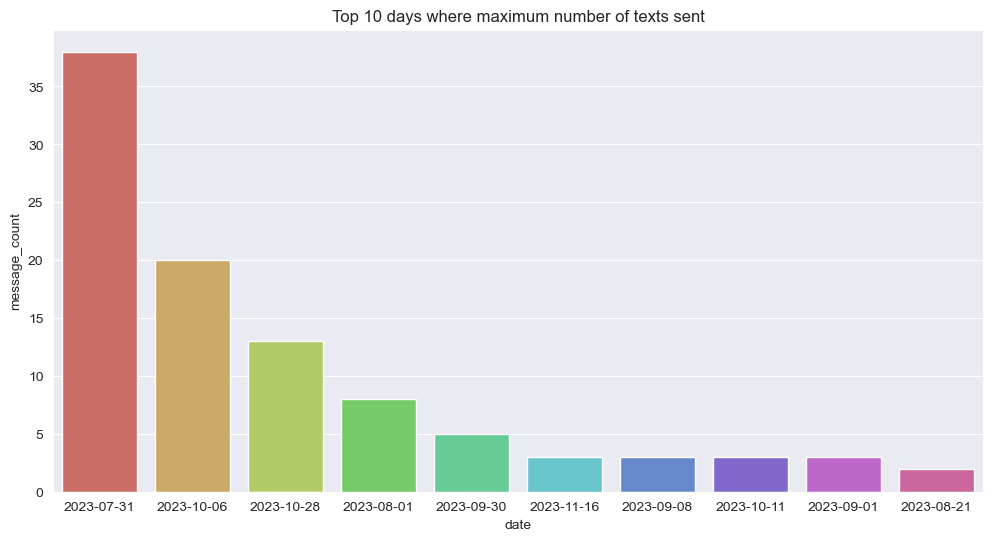

In [28]:
sns.set_style("darkgrid")

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x=top10days.date, y=top10days.message_count, palette="hls")
plt.title('Top 10 days where maximum number of texts sent');

In [29]:
line_list = df['message']
new_line_list = []

for word in line_list:
  emojis = emoji.distinct_emoji_list(word)
  new_line_list.extend([emoji.demojize(is_emoji) for is_emoji in emojis])

In [30]:
new_line_counter = collections.Counter(new_line_list)

top10emojis = pd.DataFrame()
top10emojis['emoji'] = [''] * 10
top10emojis['emoji_count'] = [0] * 10
top10emojis['emoji_description'] = [''] * 10

i = 0
for item in new_line_counter.most_common(10):
    emoji_char = item[0]
    description = emoji.demojize(emoji_char)[1:-1]
    
    # Convert emoji name to actual emoji character
    emoji_character = emoji.emojize(emoji_char)
    
    top10emojis.loc[i, 'emoji'] = emoji_character
    top10emojis.loc[i, 'emoji_count'] = int(item[1])
    top10emojis.loc[i, 'emoji_description'] = description
    i += 1

top10emojis

,emoji,emoji_count,emoji_description
0,👆,3,backhand_index_pointing_up
1,🐣,1,hatching_chick
2,👏,1,clapping_hands
3,👍🏻,1,thumbs_up_light_skin_tone
4,,0,
5,,0,
6,,0,
7,,0,
8,,0,
9,,0,


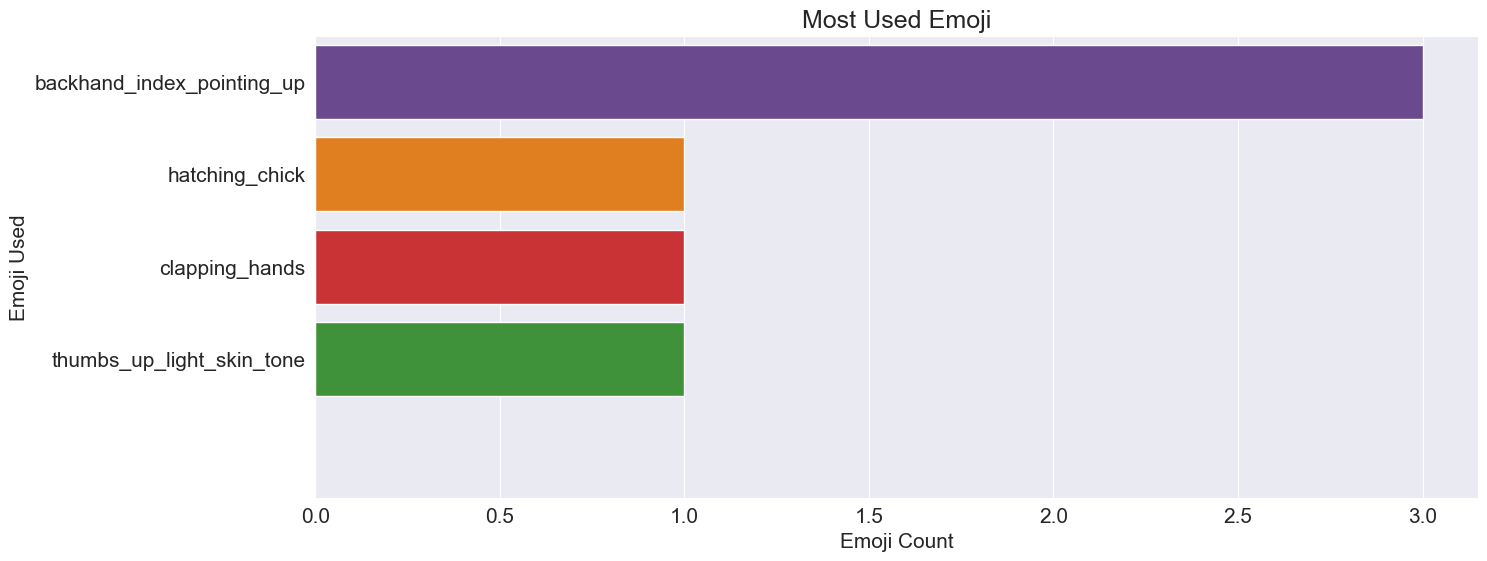

In [31]:
plt.figure(figsize=(15, 6))
matplotlib.rcParams['font.size'] = 15
sns.set_style("darkgrid")
sns.barplot(x='emoji_count', y='emoji_description', data=top10emojis, palette='Paired_r')

plt.title('Most Used Emoji')
plt.xlabel('Emoji Count')
plt.ylabel('Emoji Used')
plt.show()

In [32]:
import pandas as pd

)

df3 = df.copy()
df3['message_count'] = 1  

df3['hour'] = df3['message_date'].dt.hour 

grouped_by_time = df3.groupby('hour')['message_count'].sum().reset_index().sort_values(by='hour')

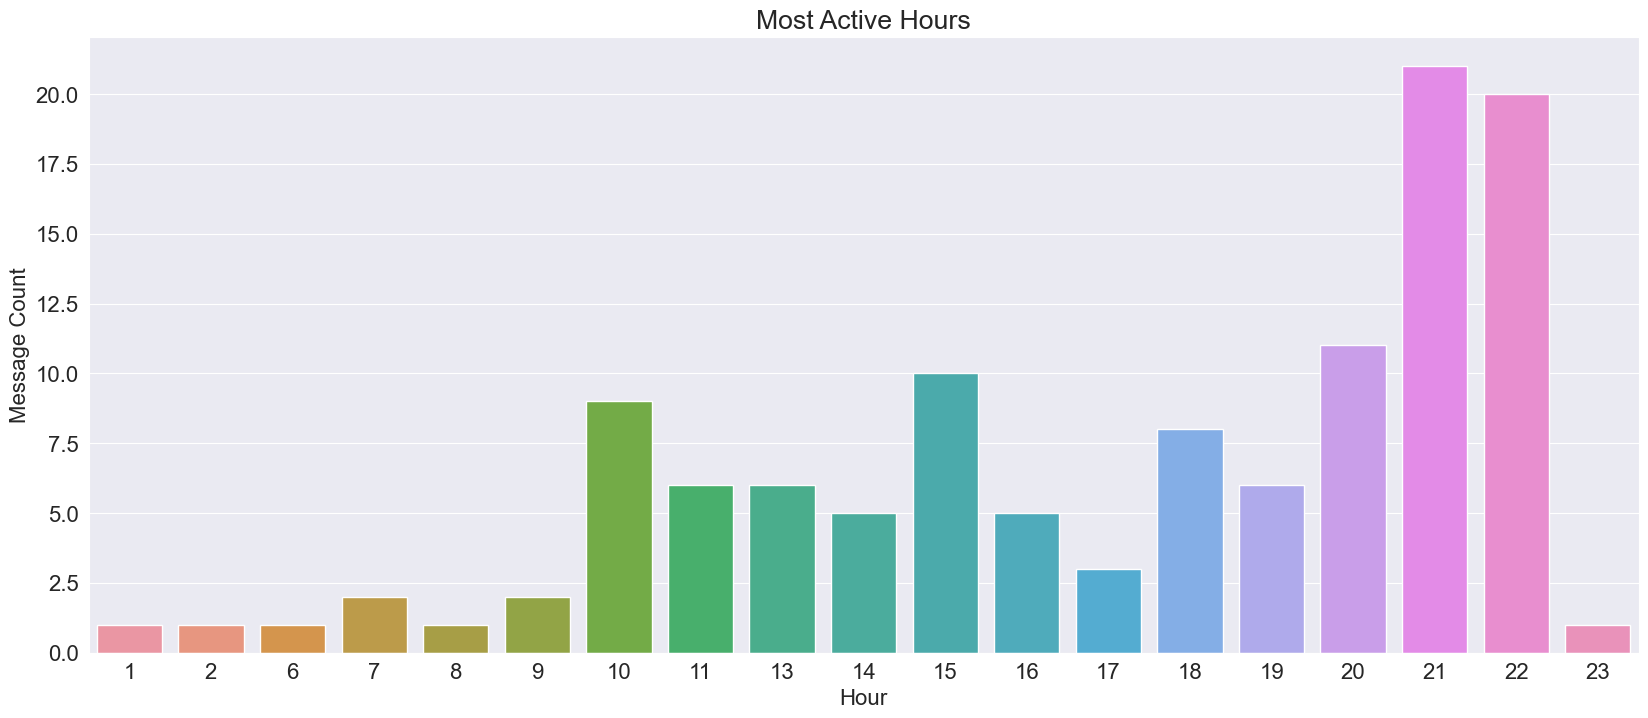

In [33]:
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (20, 8)
sns.set_style("darkgrid")

sns.barplot(x=grouped_by_time.hour, y=grouped_by_time.message_count)
plt.title('Most Active Hours')
plt.xlabel('Hour')
plt.ylabel('Message Count')
plt.show()